In [1]:
from mseed_predictor import *
import os

json_basepath = os.path.join(os.getcwd(),"station_list.json")

mseed_predictor(input_dir=r'./Japan_MSEED/',   
         input_model='Model/test_trainer_016.h5',
         stations_json=json_basepath,
         output_dir='detections2',
         P_threshold=0.1,
         S_threshold=0.1, 
         number_of_plots=10,
         normalization_mode='std',
         batch_size=1,
         overlap=0.8,
         gpuid=None,
         gpu_limit=None) 

2023-01-22 10:53:49.904641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('./detections2/TOWH_outputs/X_prediction_results.csv', low_memory=False)
data

,file_name,network,station,instrument_type,station_lat,station_lon,station_elv,p_arrival_time,p_probability,s_arrival_time,s_probability
0,TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__20...,0,TOWH,0,0,0,0,2014-01-01 00:44:33.710000,0.764,2014-01-01 00:44:43.610000,0.715
1,TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__20...,0,TOWH,0,0,0,0,2014-01-01 00:44:33.710000,0.766,2014-01-01 00:44:43.610000,0.748
2,TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__20...,0,TOWH,0,0,0,0,2014-01-01 00:44:33.690000,0.675,2014-01-01 00:44:43.610000,0.730
3,TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__20...,0,TOWH,0,0,0,0,NaN,NaN,2014-01-01 00:44:43.620000,0.616
4,TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__20...,0,TOWH,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23653,TOWH/J.TOWH.Z__2014-11-26T01_03_11.940000Z__20...,0,TOWH,0,0,0,0,2014-11-26 01:03:46.380000,0.692,2014-11-26 01:03:56.690000,0.798
23654,TOWH/J.TOWH.Z__2014-11-26T01_03_11.940000Z__20...,0,TOWH,0,0,0,0,2014-11-26 01:03:46.340000,0.483,2014-11-26 01:03:56.690000,0.785
23655,TOWH/J.TOWH.Z__2014-11-26T01_03_11.940000Z__20...,0,TOWH,0,0,0,0,NaN,NaN,2014-11-26 01:03:56.710000,0.749
23656,TOWH/J.TOWH.Z__2014-11-26T01_03_11.940000Z__20...,0,TOWH,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
import obspy
finalnameall=[]
Parrivalfinal=[]
Pprobfinal=[]

name = (np.unique(data['file_name']))

for u in range(0,len(name)):
    
    exist = np.where(data['file_name']==name[u])[0]
    Parrival = np.array(data['p_arrival_time'][exist]) 
    Pprob = np.array(data['p_probability'][exist])
    
    PprobA = []
    ParrivalA = []
    for ku,zu in zip(Parrival,Pprob):
        if len(str(ku))>4:
            ParrivalA.append(ku)
            PprobA.append(zu)
            
    if len(PprobA)>0:
        #flagind = np.argmax(PprobA)

        flagind = 0
        finalnameall.append(name[u])
        Parrivalfinal.append(ParrivalA[flagind])
        Pprobfinal.append(PprobA[flagind])
        
    else:
        finalnameall.append(name[u])
        Parrivalfinal.append('nan')
        Pprobfinal.append('nan')

In [4]:
PWaveTime   = np.load(r'./Japan_Catalog_Picks/PWaveTime.npy',allow_pickle=True)
SWaveTime   = np.load(r'./Japan_Catalog_Picks/SWaveTime.npy',allow_pickle=True)
TOWMAGall   = np.load(r'./Japan_Catalog_Picks/TOWMAGall.npy')
TOWDEPTHall = np.load(r'./Japan_Catalog_Picks/TOWDEPTHall.npy')
TOWLATall   = np.load(r'./Japan_Catalog_Picks/TOWLATall.npy')
TOWLONGall  = np.load(r'./Japan_Catalog_Picks/TOWLONGall.npy')
filenameallREAD = np.load(r'./Japan_Catalog_Picks/filenameall.npy')

PCAT=[]
for i in PWaveTime:
    PCAT.append(obspy.UTCDateTime(i))
PCAT = np.array(PCAT)

SCAT=[]
for i in SWaveTime:
    SCAT.append(obspy.UTCDateTime(i))
SCAT = np.array(SCAT)

len(PCAT), len(SCAT)


(3943, 3943)

In [5]:
# print(filenameall)
# SCAT[0]
len(finalnameall)

3943

In [6]:
print(filenameallREAD) ##filenameallREAD is from catalog files

['TOWH/J.TOWH.Z__2014-05-02T00:10:34.230000Z__2014-05-02T00:12:34.230000Z.mseed'
 'TOWH/J.TOWH.Z__2014-05-02T01:36:30.430000Z__2014-05-02T01:38:30.430000Z.mseed'
 'TOWH/J.TOWH.Z__2014-05-02T02:18:21.800000Z__2014-05-02T02:20:21.800000Z.mseed'
 ...
 'TOWH/J.TOWH.Z__2014-11-26T00:13:14.720000Z__2014-11-26T00:15:14.720000Z.mseed'
 'TOWH/J.TOWH.Z__2014-11-26T00:44:22.260000Z__2014-11-26T00:46:22.260000Z.mseed'
 'TOWH/J.TOWH.Z__2014-11-26T01:03:11.940000Z__2014-11-26T01:05:11.940000Z.mseed']


In [7]:
print(finalnameall)    ##finalnameall is from EQCCT picking

['TOWH/J.TOWH.Z__2014-01-01T00_43_59.210000Z__2014-01-01T00_45_59.210000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T00_46_26.740000Z__2014-01-01T00_48_26.740000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T02_43_15.520000Z__2014-01-01T02_45_15.520000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T03_35_12.240000Z__2014-01-01T03_37_12.240000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T04_40_26.690000Z__2014-01-01T04_42_26.690000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T06_20_11.840000Z__2014-01-01T06_22_11.840000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T06_40_17.620000Z__2014-01-01T06_42_17.620000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T09_52_23.680000Z__2014-01-01T09_54_23.680000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T12_22_06.190000Z__2014-01-01T12_24_06.190000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T14_05_49.520000Z__2014-01-01T14_07_49.520000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T17_03_16.380000Z__2014-01-01T17_05_16.380000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T22_36_36.900000Z__2014-01-01T22_38_36.900000Z.mseed', 'TOWH/J.TOWH.Z__2014-01-01T

In [8]:
##filenameallREAD is from catalog files
##finalnameall is from EQCCT picking
## filenameallREAD and finalnameall have different formats so we need to create a different 
# finalnameall or filenameallREAD
# It is easier to change "filenameallREAD" by
filenameallREAD=[ii.replace(":", "_" ) for ii in filenameallREAD]
print(filenameallREAD)

['TOWH/J.TOWH.Z__2014-05-02T00_10_34.230000Z__2014-05-02T00_12_34.230000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T01_36_30.430000Z__2014-05-02T01_38_30.430000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T02_18_21.800000Z__2014-05-02T02_20_21.800000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T03_11_34.860000Z__2014-05-02T03_13_34.860000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T04_57_10.800000Z__2014-05-02T04_59_10.800000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T05_32_56.560000Z__2014-05-02T05_34_56.560000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T08_01_53.570000Z__2014-05-02T08_03_53.570000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T10_04_00.420000Z__2014-05-02T10_06_00.420000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T11_41_40.340000Z__2014-05-02T11_43_40.340000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T13_20_17.090000Z__2014-05-02T13_22_17.090000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T14_56_45.670000Z__2014-05-02T14_58_45.670000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T18_15_02.020000Z__2014-05-02T18_17_02.020000Z.mseed', 'TOWH/J.TOWH.Z__2014-05-02T

In [9]:
countp = []
for g in Parrivalfinal:
    if len(str(g))<10:
        countp.append(g)
len(countp)    

12

In [10]:
samp = 50
PEQ_err = []
miss=[]
mag=[]
dep=[]
filenameallREAD = np.array(filenameallREAD)
finalnameall = np.array(finalnameall)
missname=[]
PEQ_errName=[]
PEQ_errVal=[]
for i in range(len(filenameallREAD)):
    #temp = data['file_name'][i]
    temp = filenameallREAD[i]
    
    try:
        indxPick = np.where(finalnameall==temp)[0]
        PEQ_err.append(PCAT[i]-obspy.UTCDateTime(Parrivalfinal[indxPick[0]]))
        mag.append(TOWMAGall[indxPick])
        dep.append(TOWDEPTHall[indxPick])
        
        zo = PCAT[i]-obspy.UTCDateTime(Parrivalfinal[indxPick[0]])
        if zo>(samp/100):
            PEQ_errName.append(filenameallREAD[i])
            PEQ_errVal.append(zo)
            
    except:
        miss.append(filenameallREAD[i])
        #missname.append(i)
        continue
        
mag = np.array(mag)
dep = np.array(dep)
PEQ_err = np.array(PEQ_err)*100
len(PEQ_err), len(np.where(np.abs(PEQ_err)<=samp)[0]), len(miss)

(3931, 3754, 12)

In [11]:
len(np.where(np.abs(PEQ_err)<=samp)[0]) /len(PEQ_err)

0.9549732892393793

In [12]:
a0 = np.where(np.abs(PEQ_err)<=samp)[0]
np.mean(PEQ_err[a0]/100), np.mean(np.abs(PEQ_err[a0])/100), np.std(PEQ_err[a0]/100)

(0.019680340969632396, 0.03912626531699521, 0.06105321488444357)

In [13]:
#003 (0.015358418017028289, 0.03775885745674265, 0.050380472932146377,  92.64, 92.34)
#006 (0.024432040189785093, 0.04585542841194530, 0.056218194597406401,  91.11, 90.87)

1

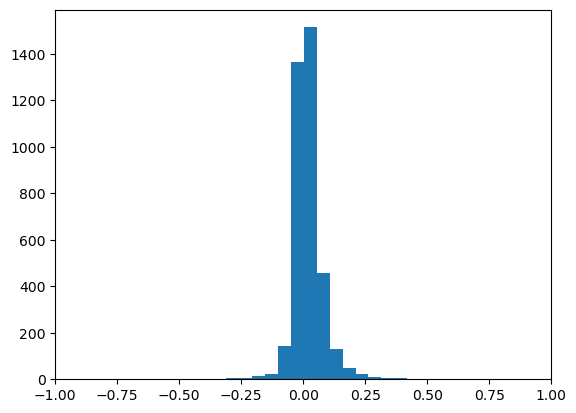

In [14]:
import matplotlib.pyplot as plt

plt.hist(PEQ_err/100, bins=2000)
plt.xlim([-1,1])
1

In [15]:
TP = len(np.where(np.abs(PEQ_err)<=samp)[0])
TN = 0
FP = 0
FN = len(miss) + len(np.where(np.abs(PEQ_err)>samp)[0])
R = TP /(TP + FN)
TP+TN+FP+FN, R

(3943, 0.9520669540958661)

In [16]:
len(PEQ_err) + len(miss)

3943

In [17]:
import obspy
finalnameall=[]
Sarrivalfinal=[]
Sprobfinal=[]

name = (np.unique(data['file_name']))

for u in range(0,len(name)):
    
    exist = np.where(data['file_name']==name[u])[0]
    Sarrival = np.array(data['s_arrival_time'][exist]) 
    Sprob = np.array(data['s_probability'][exist])
    
    SprobA = []
    SarrivalA = []
    for ku,zu in zip(Sarrival,Sprob):
        if len(str(ku))>4:
            SarrivalA.append(ku)
            SprobA.append(zu)
            
    if len(SprobA)>0:
        #flagind = np.argmax(SprobA)
        flagind = 0
        finalnameall.append(name[u])
        Sarrivalfinal.append(SarrivalA[flagind])
        Sprobfinal.append(SprobA[flagind])
        
    else:
        finalnameall.append(name[u])
        Sarrivalfinal.append('nan')
        Sprobfinal.append('nan')

In [18]:
counts = []
for g in Sarrivalfinal:
    if len(str(g))<10:
        counts.append(g)
len(counts)    

21

In [19]:
samp = 50
SEQ_err = []
miss=[]
mag=[]
dep=[]
filenameallREAD = np.array(filenameallREAD)
finalnameall = np.array(finalnameall)
#for i in range(len(finalnameall)):
#    finalnameall[i] = finalnameall[i].replace('_',':')
#    finalnameall[i] = finalnameall[i].replace('::','__')
    

missname=[]
for i in range(len(filenameallREAD)):
    #temp = data['file_name'][i]
    temp = filenameallREAD[i]
    
    try:
        indxPick = np.where(finalnameall==temp)[0]
        SEQ_err.append(SCAT[i]-obspy.UTCDateTime(Sarrivalfinal[indxPick[0]]))
        mag.append(TOWMAGall[indxPick])
        dep.append(TOWDEPTHall[indxPick])
    except:
        miss.append(filenameallREAD[i])
        #missname.append(i)
        continue
        
mag = np.array(mag)
dep = np.array(dep)
SEQ_err = np.array(SEQ_err)*100
len(SEQ_err), len(np.where(np.abs(SEQ_err)<=samp)[0]), len(miss)

(3922, 3765, 21)

In [20]:
len(np.where(np.abs(SEQ_err)<=samp)[0]) /len(SEQ_err)

0.9599694033656297

In [21]:
a0 = np.where(np.abs(SEQ_err)<=samp)[0]
np.mean(SEQ_err[a0]/100), np.mean(np.abs(SEQ_err[a0])/100), np.std(SEQ_err[a0]/100)

(0.01785922974767596, 0.06285790172642763, 0.09247999014289712)

1

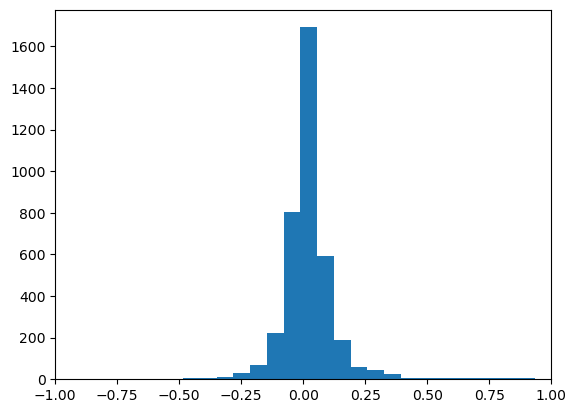

In [22]:
import matplotlib.pyplot as plt

plt.hist(SEQ_err/100, bins=2000)
plt.xlim([-1,1])
1

In [23]:
TP = len(np.where(np.abs(SEQ_err)<=samp)[0])
TN = 0
FP = 0
FN =  len(miss) + len(np.where(np.abs(SEQ_err)>samp)[0])
R = TP /(TP + FN)
TP+TN+FP+FN, R

(3943, 0.9548567080902866)